In [1]:
# import des librairies 
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import pickle

# clean data
from transformers import BertTokenizer, BertForTokenClassification, BertForSequenceClassification
import torch
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torch.nn.functional import softmax

# charger le modèle 
from tensorflow.keras.models import load_model

2023-08-24 14:40:01.655133: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 14:40:03.839702: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
jobs_df = pd.read_csv("../data/silver_data.csv")
# préparer un df avec uniquement les colonnes à utiliser pour le modèle
df = jobs_df[["jobs", "description", "ID_dep", "ville", "date", "experience", "skills", "tools", "industry", "company", "company_description"]]
df.head(3)

,jobs,description,ID_dep,ville,date,experience,skills,tools,industry,company,company_description
0,Data Engineer sénior (F/H) CDI (H/F),"En tant que Data Engineer chez Quantmetry, vou...",75,PARIS 08,2023/07/12,5 ans,"concevoir et gérer un projet, concevoir un log...",NaN,Conseil pour les affaires et autres conseils d...,QUANTMETRY,Pure player en Data et Intelligence Artificiel...
1,Data Consultant Stratégie Sénior (H/F),Nous recrutons des personnes avec une appétenc...,75,PARIS 08,2023/07/12,5 ans,"analyser les résultats d'un projet, décliner l...",NaN,Conseil pour les affaires et autres conseils d...,QUANTMETRY,Pure player en Data et Intelligence Artificiel...
2,Chef de projets Performance Durable/Energie/Da...,Intégré(e) au sein de la Direction Performance...,92,ASNIERES SUR SEINE,2023/07/13,3 ans,contrôler et faire appliquer le respect de dis...,tableau,Activités des sièges sociaux,NEXITY,Nexity est aujourd hui leader sur les différen...


In [3]:
# Initialiser le modèle et le tokenizer
# model_name = "bert-base-multilingual-cased"
# model = BertForSequenceClassification.from_pretrained(model_name)
# tokenizer = BertTokenizer.from_pretrained(model_name)

In [4]:
# # Créer un DataFrame à partir de la liste
# df = pd.DataFrame(possible_titles, columns=["Possible Title"])

# # Sauvegarder le DataFrame au format CSV
# df.to_csv("../data/possible_title.csv", index=False)

In [5]:
possible_title_df = pd.read_csv("../data/possible_title.csv")
possible_title_df.head()

,Possible Title
0,ABAP Developer
1,ASIC Design Engineer
2,ASIC Engineer
3,ASP.NET Developer
4,Actuarial Associate


In [6]:
def predict_job_title(title_to_check):
    max_prob = 0
    best_title = ""
    
    for possible_title in possible_titles:
        # Tokenizing title_to_check with possible_title
        encoded_input = tokenizer(title_to_check, text_pair=possible_title, padding='max_length', truncation=True, max_length=150, return_tensors='pt')
        outputs = model(**encoded_input)
        
        probs = softmax(outputs.logits, dim=1)
        cur_prob = probs[0][1].item()
        
        if cur_prob > max_prob:
            max_prob = cur_prob
            best_title = possible_title

    return best_title

possible_titles = list(possible_title_df["Possible Title"].values)
jobs_list_1 = list(df["jobs"].values)

In [7]:
possible_titles[:10]

['ABAP Developer',
 'ASIC Design Engineer',
 'ASIC Engineer',
 'ASP.NET Developer',
 'Actuarial Associate',
 'Actuarial Consultant',
 'Actuary',
 'Administrator, Lotus Notes',
 'Alliance Manager, Enterprise Software',
 'Analyst Methods & Procedures']

In [8]:
# jobs_list = jobs_list[:3]

In [9]:
# Predict for each job in the list
# cleaned_jobs = [predict_job_title(job) for job in jobs_list]

In [10]:
# len(cleaned_jobs)

In [11]:
# cleaned_jobs[:100]

In [12]:
# Replace jobs du df par la nouvelle liste de job clean

### Entraîner le modèle de summarization de job title

In [13]:
# import des librairies
from transformers import T5ForConditionalGeneration, T5Tokenizer
import pandas as pd
import numpy as np 

In [14]:
jobs_df = pd.read_csv("../data/silver_data.csv")
# préparer un df avec uniquement les colonnes à utiliser pour le modèle
df = jobs_df[["jobs", "description", "ID_dep", "ville", "date", "experience", "skills", "tools", "industry", "company", "company_description"]]
df.head(3)

,jobs,description,ID_dep,ville,date,experience,skills,tools,industry,company,company_description
0,Data Engineer sénior (F/H) CDI (H/F),"En tant que Data Engineer chez Quantmetry, vou...",75,PARIS 08,2023/07/12,5 ans,"concevoir et gérer un projet, concevoir un log...",NaN,Conseil pour les affaires et autres conseils d...,QUANTMETRY,Pure player en Data et Intelligence Artificiel...
1,Data Consultant Stratégie Sénior (H/F),Nous recrutons des personnes avec une appétenc...,75,PARIS 08,2023/07/12,5 ans,"analyser les résultats d'un projet, décliner l...",NaN,Conseil pour les affaires et autres conseils d...,QUANTMETRY,Pure player en Data et Intelligence Artificiel...
2,Chef de projets Performance Durable/Energie/Da...,Intégré(e) au sein de la Direction Performance...,92,ASNIERES SUR SEINE,2023/07/13,3 ans,contrôler et faire appliquer le respect de dis...,tableau,Activités des sièges sociaux,NEXITY,Nexity est aujourd hui leader sur les différen...


In [15]:
df = df[df['jobs'].notna()]
df.shape

(2613, 11)

In [16]:
# Nettoyage de la colonne 'Jobs'
df['jobs'] = df['jobs'].str.replace(r"\(H/F\)", "", regex=True) \
                       .str.replace(r"\(F/H\)", "", regex=True) \
                       .str.replace(r"\(h/f\)", "", regex=True) \
                       .str.replace(r"\s*-?\s*CDI\s*", "", regex=True) \
                       .str.replace(r"\s*-?\s*CDD\s*", "", regex=True) \
                       .str.replace(r"\s*H/F\s*", "", regex=True) \
                       .str.replace(r"\s*F/H\s*", "", regex=True) \
                       .str.strip()

In [32]:
jobs_dirty = df["jobs"].tolist()
texts = jobs_dirty[450:500]
print(len(texts))
texts      

50


['Architecte DATA - Domaines SI',
 'Gouvernance de données / Data Steward (f/h)- Système, réseaux, données',
 'Data Manager Méthode',
 'Consultant BI / Data Analyst Power BI confirmé',
 'Data analyst',
 'Développeur Data Platform',
 'Data manager',
 'PMO / Data Analyst',
 'Architecte Data SEPA',
 'Azure Data Engineer(IT) / Freelance',
 'Tech Lead Data- Confirmé',
 'consultant informatique data migration SAP ADM (IT) / Freelance',
 'Data Engineer (IT) / Freelance',
 'Data Center Architect - Freelance - Opportunités à distance (IT) / Freelance',
 'Data manager informatique  (IT) / Freelance',
 'Data analyste informatique Tableau (IT) / Freelance',
 'Data Centre Architect (IT) / Freelance',
 'Expert DATA CLOUD AZURE SSIS PYSPARK (IT) / Freelance',
 'consultant informatique Data Gouvernance Data Management : connaissance AB INIITO obligatoire (IT) / Freelance',
 'Un Data Engineer sur Grenoble (IT) / Freelance',
 'Data analyste informatique  (IT) / Freelance',
 'Tech Lead Big Data spark had

In [18]:
# # Créer un DataFrame à partir de la liste
# df_job_clean = pd.DataFrame(simplified_job_titles, columns=["job_titles_clean"])

# # Sauvegarder le DataFrame au format CSV
# df_job_clean.to_csv("../data/df_job_clean.csv", index=False)

In [19]:
df_job_clean = pd.read_csv("../data/df_job_clean.csv")
df_job_clean.shape

(500, 1)

In [20]:
# concat ce df_job_clean au data frame principal
df = pd.concat([df, df_job_clean], axis=1)

In [21]:
df_train = df.iloc[0:500]
df_train.shape

(500, 12)

In [22]:
# Prétraitement : minuscule, suppression des caractères non souhaités (vous pouvez ajouter plus)
df_train['jobs'] = df_train['jobs'].str.lower().str.replace('[^a-z\s]', '')
df_train['job_titles_clean'] = df_train['job_titles_clean'].str.lower().str.replace('[^a-z\s]', '')

/tmp/ipykernel_8353/2803835521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['jobs'] = df_train['jobs'].str.lower().str.replace('[^a-z\s]', '')
/tmp/ipykernel_8353/2803835521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['job_titles_clean'] = df_train['job_titles_clean'].str.lower().str.replace('[^a-z\s]', '')


In [23]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Initialisation du tokenizer pour les titres de jobs "clean"
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(df_train['job_titles_clean'].tolist())
output_tokens = tokenizer.texts_to_sequences(df_train['job_titles_clean'])

# Padding des séquences de sortie pour avoir une longueur fixe
output_tokens_padded = pad_sequences(output_tokens, padding='post')

# Initialisation du tokenizer BERT
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

input_tokens = bert_tokenizer.batch_encode_plus(df_train['jobs'].tolist(), padding=True, return_tensors="tf", truncation=True, max_length=50)
output_tokens = tokenizer.texts_to_sequences(df_train['job_titles_clean'])

# Séparation Train/Test
input_train, input_test, output_train, output_test = train_test_split(input_tokens['input_ids'].numpy(), output_tokens, test_size=0.2)

max_len = 37
output_train = pad_sequences(output_train, maxlen=max_len, padding='post')
output_test = pad_sequences(output_test, maxlen=max_len, padding='post')

output_train = np.array(output_train)
output_test = np.array(output_test)

# Paramètres
bert_dim = bert_model.config.hidden_size
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
decoder_units = 128

# Construire le modèle
input_layer = Input(shape=(None,), dtype=tf.int32)
bert_output = bert_model(input_layer)
lstm_layer = Bidirectional(LSTM(decoder_units, return_sequences=True))(bert_output[0])
output_layer = Dense(vocab_size, activation='softmax')(lstm_layer)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPo   109482240 
 )                           olingAndCrossAttentions             
                             (last_hidden_state=(Non             
                             e, None, 768),                      
                              pooler_output=(None, 7             
                             68),                                
                              past_key_values=None,              
                             hidden_states=None, att             
                             entions=None, cross_att             
                             entions=None)                       
                                                             

In [31]:
# Formation du modèle
Baseline = model.fit(input_train, output_train, epochs=50, batch_size=32, validation_data=(input_test, output_test))

# Évaluation
loss, accuracy = model.evaluate(input_test, output_test)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Epoch 1/50
13/13 [==============================] - 170s 9s/step - loss: 1.6593 - accuracy: 0.7784 - val_loss: 0.5024 - val_accuracy: 0.9273
Epoch 2/50
13/13 [==============================] - 111s 9s/step - loss: 2.0491 - accuracy: 0.7103 - val_loss: 2.1972 - val_accuracy: 0.9273
Epoch 3/50
13/13 [==============================] - 109s 8s/step - loss: 0.4875 - accuracy: 0.9265 - val_loss: 0.3545 - val_accuracy: 0.9273
Epoch 4/50
13/13 [==============================] - 109s 8s/step - loss: 0.3336 - accuracy: 0.9282 - val_loss: 0.3156 - val_accuracy: 0.9403
Epoch 5/50
13/13 [==============================] - 123s 10s/step - loss: 0.3085 - accuracy: 0.9415 - val_loss: 0.3005 - val_accuracy: 0.9403
Epoch 6/50
13/13 [==============================] - 135s 10s/step - loss: 0.2965 - accuracy: 0.9433 - val_loss: 0.2924 - val_accuracy: 0.9470
Epoch 7/50
13/13 [==============================] - 132s 10s/step - loss: 0.2913 - accuracy: 0.9454 - val_loss: 0.2876 - val_accuracy: 0.9470
Epoch 8/50

In [33]:
print(input_train.shape)
print(output_train.shape)
print(input_test.shape)
print(output_test.shape)
print(model.output_shape)

(400, 37)
(400, 37)
(100, 37)
(100, 37)
(None, None, 164)


MSE: 0.2673


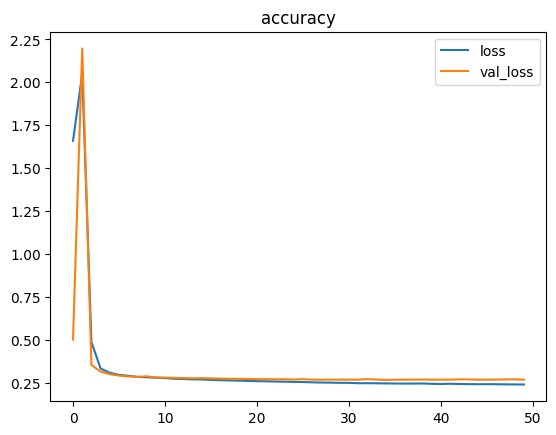

In [34]:
baseline_df = pd.DataFrame(Baseline.history)
baseline_df.loc[:, ['loss', 'val_loss']].plot(title="accuracy")
print("MSE: {:0.4f}".format(baseline_df['val_loss'].min()))

In [35]:
# sauvegarder le modèle et le tokenizer 
model.save("../API/modele_job.h5")

# Sauvegarder le tokenizer
with open('../API/tokenizer_job.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Sauvegarder le tokenizer au format JSON
tokenizer_json = tokenizer.to_json()
with open('../API/tokenizer_job_keras.json', 'w', encoding='utf-8') as f:
    f.write(tokenizer_json)

# Sauvegarder le tokenizer BERT
bert_tokenizer.save_pretrained('../API/bert_tokenizer_directory/')

# Sauvegarder le tokenizer BERT
bert_tokenizer.save_vocabulary('../API/bert_vocab.json')

/home/selmane/.pyenv/versions/3.8.12/envs/transformers_classification/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


('../API/bert_vocab.json',)

In [36]:
from transformers import TFBertModel
from tensorflow.keras.preprocessing.text import tokenizer_from_json
loaded_model = load_model('../API/modele_job.h5', custom_objects={'TFBertModel': TFBertModel})

# Charger le tokenizer plus tard
with open('../API/tokenizer_job.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

with open('../API/tokenizer_job_keras.json', 'r', encoding='utf-8') as f:
    data = f.read()
    loaded_tokenizer_keras = tokenizer_from_json(data)

# Charger le tokenizer BERT plus tard
loaded_bert_tokenizer = BertTokenizer.from_pretrained('../API/bert_tokenizer_directory/')

# Charger le tokenizer BERT à partir du vocabulaire
loaded_bert_tokenizer = BertTokenizer(vocab_file='../API/bert_vocab.json')

In [37]:
df_sample2 = df.iloc[500:1000]
df_sample2['jobs'] = df_sample2['jobs'].str.lower().str.replace('[^a-z\s]', '')
input_tokens = bert_tokenizer.batch_encode_plus(df_sample2['jobs'].tolist(), padding=True, return_tensors="tf", truncation=True, max_length=50)

/tmp/ipykernel_8353/1949459229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample2['jobs'] = df_sample2['jobs'].str.lower().str.replace('[^a-z\s]', '')


In [38]:
predictions = loaded_model.predict(input_tokens['input_ids'])

predicted_sequences = np.argmax(predictions, axis=-1)  # sélectionnez l'indice du token le plus probable à chaque position

# Convertissez ces indices en mots
predicted_texts = []
for sequence in predicted_sequences:
    text = ' '.join([loaded_tokenizer_keras.index_word.get(idx, '') for idx in sequence if idx != 0])  # 0 est généralement l'indice pour le padding, donc nous le sautons
    predicted_texts.append(text)

16/16 [==============================] - 62s 3s/step


In [39]:
df_sample2['predicted_jobs'] = predicted_texts
df_sample2.head(20)

/tmp/ipykernel_8353/1076240839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample2['predicted_jobs'] = predicted_texts


,jobs,description,ID_dep,ville,date,experience,skills,tools,industry,company,company_description,job_titles_clean,predicted_jobs
500,un architecte informatique data snowflake / ta...,Nous sommes à la recherche dun architecte Data...,59,LILLE,2023/08/02,Débutant accepté,NaN,"talend, snowflake",NaN,NaN,NaN,NaN,data data
501,un chef de projet informatique pour piloter de...,"Smarteo recherche pour lun de ses clients, Un ...",63,CLERMONT FERRAND,2023/08/02,Débutant accepté,NaN,NaN,NaN,NaN,NaN,NaN,data data
502,data ingénieur informatique (it) / freelance,Compétences techniques attendus :\n- AWS : Glu...,Ile-de-France,NaN,2023/08/02,Débutant accepté,NaN,"gitlab, jenkins",NaN,NaN,NaN,NaN,data data
503,pmo data dashboard - financier (it) / freelance,Missions du PMO : Intervenir comme PMO sur un ...,75,NaN,2023/08/02,Débutant accepté,NaN,NaN,NaN,NaN,NaN,NaN,data data
504,chef de projet informatique data center (it) /...,Les principales tâches de la mission :\n-Organ...,75,NaN,2023/08/02,Débutant accepté,NaN,NaN,NaN,NaN,NaN,NaN,data data
505,chef de projet informatique - data gcp (it) / ...,Le besoin est de disposer dun conseil opératio...,75,NaN,2023/08/02,Débutant accepté,NaN,NaN,NaN,NaN,NaN,NaN,data data
506,ingénieur informatique cybersécurité informati...,RESUME\nTu es rattaché managérialement au coup...,59,RONCHIN,2023/08/02,Débutant accepté,NaN,sas,NaN,NaN,NaN,NaN,data data
507,responsable informatique pmo plus 15 ans en ge...,Nous recherchons pour notre client du logistiq...,92,ISSY LES MOULINEAUX,2023/08/02,Débutant accepté,NaN,NaN,NaN,NaN,NaN,NaN,data data
508,data scientist (it) / freelance,Expérience dans l'entrainement de modèles de d...,79,ASNIERES EN POITOU,2023/08/02,Débutant accepté,NaN,"docker, pytorch",NaN,NaN,NaN,NaN,data data
509,business analyste informatiquee data & analyti...,Nous recherchons actuellement un Business Anal...,92,BOULOGNE BILLANCOURT,2023/08/02,Débutant accepté,NaN,"power bi, informatica",NaN,NaN,NaN,NaN,data data


### Modèle pour obtenir job_description

maintenant qu'on a les bon noms de job, on va :

- 
séparer les descriptions (description de l'offre d'emploi) dans des listes différentes en fonction du jo- b
les envoyer au modèle pour qu'il nous en ressort une description pour ce job.

In [5]:
# import des librairies
from transformers import T5ForConditionalGeneration, T5Tokenizer
import pandas as pd
import numpy as np 

In [ ]:
# Créons une liste de listes de descriptions, où chaque sous-liste contient toutes les descriptions associées à un titre de poste spécifique.
grouped_descriptions = df.groupby('job_title_clean')['description'].apply(list).to_dict()

In [ ]:
# initialize the model architecture and weights
model = T5ForConditionalGeneration.from_pretrained("t5-base")
# initialize the model tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-base")

In [ ]:
# Summariser chaque groupe de descriptions pour obtenir une description de poste
def summarize_grouped_texts(text_groups, model, tokenizer):
    summaries = {}
    
    for job_title, texts in text_groups.items():
        # Join the texts into a single string
        combined_text = ' '.join(texts)
        
        # Get the summary for this combined text
        summary = summarize_texts([combined_text], model, tokenizer)[0]
        
        summaries[job_title] = summary
        
    return summaries

In [ ]:
summaries = summarize_grouped_texts(grouped_descriptions, model, tokenizer)

In [ ]:
summaries[:3]

In [ ]:
df['job_description'] = df['job_title_clean'].map(summaries)